In [1]:
import os

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
path = '/content/drive/MyDrive/hateful_memes/hateful_memes'

In [3]:
os.chdir(path)

## ⬇ **Installing Dependencies**

In [4]:
!pip install ultralytics==8.0.231
!pip install keras_ocr==0.9.3
!pip install scikit-learn==1.4.0
!pip install seaborn==0.12.2
!pip install nltk==3.8.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 8.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

## **Importing Required Libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import keras_ocr
import ultralytics
import cv2
import random
import json

## **Task: A Object Detection**
*Overview of YOLOv8 :*<br>

1.   It is the latest iteration in the YOLO series of real-time object detectors, offering cutting-edge performance in terms of accuracy and speed.

2.  Building upon the advancements of previous YOLO versions, YOLOv8 introduces new features and optimizations that make it an ideal choice for various object detection tasks in a wide range of applications.




In [6]:
model = ultralytics.YOLO("yolov8x.pt")
results = model.predict(path + '/img/01348.png') # making prediction on single image for sample prediction


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/hateful_memes/hateful_memes/img/01348.png: 640x576 6 persons, 8 sheeps, 89.3ms
Speed: 12.7ms preprocess, 89.3ms inference, 803.5ms postprocess per image at shape (1, 3, 640, 576)


In [7]:
objects = results[0].names
type(objects)

dict

In [8]:
objects[len(objects)] = 'others' # adding another class, in case the class does not exist in the pre-defined class set
detected_objects_freq = {object:0 for object in objects.values()} # initializing the frequency of objects to 0

In [9]:
memes = os.listdir(path + '/img') #meme images directory

In [10]:
image_indexes = np.arange(len(memes))
random.shuffle(image_indexes) # shuffling the dataset to make the sample diverse
shuffled_images = [memes[index] for index in image_indexes]

**Performing Object Detection :**

In [11]:
human_images, animals_images, others_images = [], [], []

total_count = 0
humans_count = 0
animals_count = 0
others_count = 0

In [12]:
count = 0

for meme in shuffled_images:
    meme_ = cv2.imread(path + '/img/' + meme)
    resized_meme = cv2.resize(meme_, (416, 416)) # resizing memes to the dimensions required for yolo v8 model.
    results = model.predict(resized_meme)
    detected_objects_list = set()
    if len(results[0].boxes)>0:
        result = results[0]
        for box in result.boxes: # for loop iterating through the boxes in the dectection
            object_index = int(box.cls[0])
            object_class = objects[object_index]
            detected_objects_freq[object_class] += 1
            if object_class == 'person':
              detected_objects_list.add('person')
            elif object_index in range(14, 24):
              detected_objects_list.add('animal')
            else:
              detected_objects_list.add('others')

        if total_count < 6000:
          if humans_count < 3000:
              if 'person' in detected_objects_list:
                human_images.append(meme)
                humans_count += 1
                total_count += 1
              elif 'animal' in detected_objects_list and animals_count < 1500:
                animals_images.append(meme)
                animals_count += 1
                total_count += 1
              else:
                others_images.append(meme)
                others_count += 1
                total_count += 1
          elif animals_count < 1500:
            if 'animal' in detected_objects_list:
              animals_images.append(meme)
              animals_count += 1
              total_count += 1
            elif 'others' in detected_objects_list and others_count < 1500:
              others_images.append(meme)
              others_count += 1
              total_count += 1
          else:
            if 'others' in detected_objects_list:
              others_images.append(meme)
              total_count += 1

    else:
        detected_objects_freq['others'] += 1

    count += 1
    if count%100 == 0:
      print()
      print("="*100)
      print(f'{count} images detection completed')
      print("="*100)

print("Object detection for all of the images finished !!")

Streaming output truncated to the last 5000 lines.
0: 640x640 1 person, 58.9ms
Speed: 3.0ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 1 tie, 57.2ms
Speed: 2.9ms preprocess, 57.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 1 tie, 1 book, 56.5ms
Speed: 3.2ms preprocess, 56.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 donut, 57.3ms
Speed: 3.0ms preprocess, 57.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

10500 images detection completed

0: 640x640 1 dog, 59.9ms
Speed: 3.1ms preprocess, 59.9ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 55.7ms
Speed: 3.1ms preprocess, 55.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 1 parking meter, 56.8ms
Speed: 4.9ms preprocess, 56.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 6

In [25]:
print(len(detected_objects_freq))
print(detected_objects_freq)

81
{'person': 27580, 'bicycle': 106, 'car': 893, 'motorcycle': 129, 'airplane': 70, 'bus': 48, 'train': 32, 'truck': 239, 'boat': 141, 'traffic light': 109, 'fire hydrant': 10, 'stop sign': 42, 'parking meter': 10, 'bench': 194, 'bird': 524, 'cat': 279, 'dog': 872, 'horse': 229, 'sheep': 756, 'cow': 273, 'elephant': 38, 'bear': 186, 'zebra': 6, 'giraffe': 63, 'backpack': 311, 'umbrella': 179, 'handbag': 427, 'tie': 2296, 'suitcase': 102, 'frisbee': 98, 'skis': 34, 'snowboard': 12, 'sports ball': 115, 'kite': 155, 'baseball bat': 163, 'baseball glove': 73, 'skateboard': 49, 'surfboard': 144, 'tennis racket': 64, 'bottle': 648, 'wine glass': 161, 'cup': 725, 'fork': 83, 'knife': 128, 'spoon': 209, 'bowl': 432, 'banana': 134, 'apple': 49, 'sandwich': 76, 'orange': 69, 'broccoli': 26, 'carrot': 75, 'hot dog': 126, 'pizza': 71, 'donut': 116, 'cake': 203, 'chair': 1044, 'couch': 297, 'potted plant': 234, 'bed': 291, 'dining table': 427, 'toilet': 49, 'tv': 142, 'laptop': 205, 'mouse': 55, 'r

In [23]:
# Cataloging the types of objects detected

transport = ['bicycle',
             'car',
             'motorcycle',
             'airplane',
             'bus',
             'train',
             'boat',
             'truck']

street_objects = ['traffic light',
                  'fire hydrant',
                  'stop sign',
                  'parking meter',
                  'bench']

animals = ['bird',
           'cat',
           'dog',
           'horse',
           'sheep',
           'cow',
           'elephant',
           'bear',
           'zebra',
           'giraffe']

sporting_goods = ['frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket']

household_things = ['book',
                    'clock',
                    'vase',
                    'scissors',
                    'teddy bear',
                    'hair drier',
                    'toothbrush',
                    'chair',
                    'couch',
                    'potted plant',
                    'bed',
                    'dining table',
                    'toilet',
                    'sink',
                    'backpack',
                    'umbrella',
                    'handbag',
                    'tie',
                    'suitcase']

food = ['banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake']

electronics = ['tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'refrigerator']

crockery = ['bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl']

In [24]:
categories = ['crockery', 'electronics', 'food', 'household_things', 'animals', 'sporting_goods', 'street_objects', 'transport']
categories_and_freq = {}

index = 0
for category in [crockery, electronics, food, household_things, animals, sporting_goods, street_objects, transport]:
  total_frequency = 0
  for object in category:
    total_frequency += detected_objects_freq[object]
  categories_and_freq[categories[index]] = total_frequency
  index += 1

categories_and_freq['person'] = detected_objects_freq['person']
categories_and_freq['others'] = detected_objects_freq['others']

In [21]:
categories_and_freq

{'crockery': 2386,
 'electronics': 1412,
 'food': 945,
 'household_things': 6934,
 'animals': 3226,
 'sporting_goods': 907,
 'street_objects': 365,
 'transport': 1658,
 'person': 27580,
 'others': 582}

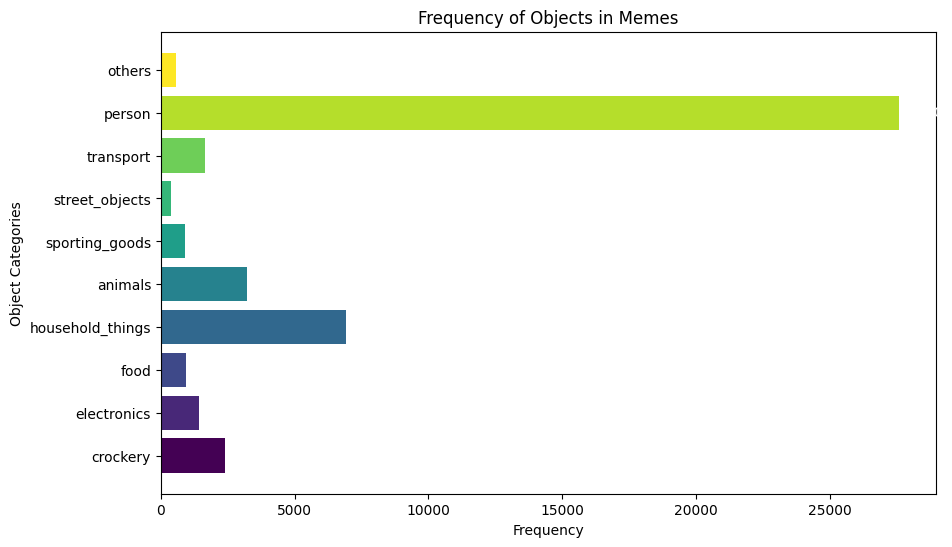

In [26]:
# Extracting category labels and frequencies
categories = list(categories_and_freq.keys())
frequencies = list(categories_and_freq.values())

# Creating a color gradient for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(categories, frequencies, color=colors)

# Adding labels and title
plt.xlabel("Frequency")
plt.ylabel("Object Categories")
plt.title("Frequency of Objects in Memes")

# Adding frequency values on the bars
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(freq),
             va='center', ha='left', fontsize=10, color='white')

# Displaying the plot
plt.show()
